In [395]:
import numpy as np
import pandas as pd
import math

In [396]:
np.random.seed(42)

In [397]:
df = pd.read_csv('iris.csv')

In [398]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [399]:
df.shape

(150, 6)

In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [401]:
df = df.drop(['Id'], axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [402]:
pd.unique(df[['Species']].values.ravel())

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [403]:
target_encoded_values = {"Species": {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}}
df = df.replace(target_encoded_values)
# df.head()
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [404]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Splitting data into training and testing part

In [405]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [406]:
unorganized = df.sample(frac=1, random_state=1)
unorganized.shape

(150, 5)

In [407]:
unorganized.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
14,5.8,4.0,1.2,0.2,0
98,5.1,2.5,3.0,1.1,1
75,6.6,3.0,4.4,1.4,1
16,5.4,3.9,1.3,0.4,0
131,7.9,3.8,6.4,2.0,2
56,6.3,3.3,4.7,1.6,1
141,6.9,3.1,5.1,2.3,2
44,5.1,3.8,1.9,0.4,0
29,4.7,3.2,1.6,0.2,0
120,6.9,3.2,5.7,2.3,2


In [408]:
train = unorganized.iloc[:int(0.7*len(unorganized)), :]
train.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
14,5.8,4.0,1.2,0.2,0
98,5.1,2.5,3.0,1.1,1
75,6.6,3.0,4.4,1.4,1
16,5.4,3.9,1.3,0.4,0
131,7.9,3.8,6.4,2.0,2
56,6.3,3.3,4.7,1.6,1
141,6.9,3.1,5.1,2.3,2
44,5.1,3.8,1.9,0.4,0
29,4.7,3.2,1.6,0.2,0
120,6.9,3.2,5.7,2.3,2


In [409]:
print(train.shape)

(105, 5)


In [410]:
test = unorganized.iloc[int(0.7*len(unorganized)): , :]
test.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
26,5.0,3.4,1.6,0.4,0
76,6.8,2.8,4.8,1.4,1
43,5.0,3.5,1.6,0.6,0
24,4.8,3.4,1.9,0.2,0
136,6.3,3.4,5.6,2.4,2
121,5.6,2.8,4.9,2.0,2
143,6.8,3.2,5.9,2.3,2
49,5.0,3.3,1.4,0.2,0
21,5.1,3.7,1.5,0.4,0
70,5.9,3.2,4.8,1.8,1


In [411]:
print(test.shape)

(45, 5)


## Splitting the dataset into feature and target variables, for both training and testing part.

In [412]:
#for feature variables in training and testing dataset
X_train = train.iloc[:, :4]
X_test = test.iloc[:, :4]

#for target variables in training and testing dataset
y_train = train.iloc[:, 4:]
y_test = test.iloc[:, 4:]

In [413]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


Looking at the X, we see that there are 4 main features in it. Now we create a First layer with weight matrix which includes 4 feautures and 3 nodes 

In [414]:
def initialize_weights_and_bias(mode, distribution='normal'):
    if mode == 'random':
        W1 = np.random.random((3, 4)).astype(np.float32)
        b1 = np.random.random((1, 3)).astype(np.float32)
        W2 = np.random.random((3, 3)).astype(np.float32)
        b2 = np.random.random((1, 3)).astype(np.float32)
    elif mode == 'xavier':
        if distribution == 'normal':
            W1 = np.random.normal(loc=0.0, scale=np.sqrt(2/(4+3)), size=(3, 4)).astype(np.float32)
            b1 = np.random.random((1, 3)).astype(np.float32)
#             b1 = np.random.normal(loc=0.0, scale=np.sqrt(2/(3+3)), size=(1, 3)).astype(np.float32)
            W2 = np.random.normal(loc=0.0, scale=np.sqrt(2/(3+3)), size=(3, 3)).astype(np.float32)
            b2 = np.random.random((1, 3)).astype(np.float32)
#             b2 = np.random.normal(loc=0.0, scale=np.sqrt(2/(3+3)), size=(1, 3)).astype(np.float32)
        elif distribution == 'uniform':
            W1 = np.random.uniform(low = -(6/np.sqrt(4+3)), high = (6/np.sqrt(4+3)), size=(3, 4)).astype(np.float32)
            b1 = np.random.random((1, 3)).astype(np.float32)
#             b1 = np.random.uniform(low = -(6/np.sqrt(3+3)), high = (6/np.sqrt(3+3)), size=(1, 3)).astype(np.float32)
            W2 = np.random.uniform(low = -(6/np.sqrt(3+3)), high = (6/np.sqrt(3+3)), size=(3, 3)).astype(np.float32)
            b2 = np.random.random((1, 3)).astype(np.float32)
#             b2 = np.random.uniform(low = -(6/np.sqrt(3+3)), high = (6/np.sqrt(3+3)), size=(1, 3)).astype(np.float32)
    elif mode == 'constant':
        W1 = np.ones((3, 4))
        b1 = np.ones((1, 3))
        W2 = np.ones((3, 3))
        b2 = np.ones((1, 3))
    return W1, b1, W2, b2

In [415]:
#Activation Functions
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=1)

def tanh(x):
    return np.tanh(x)

In [416]:
def forward_pass(x, W1, b1, W2, b2):
    
    #First layer
    x = np.array(x, dtype=np.float32)
    res1 = np.matmul(x, W1.T) + b1
    layer1_out = sigmoid(res1)
#     print(f"Layer 1 = {layer1_out}")
    
    #Second layer
    res2 = np.matmul(layer1_out, W2.T) + b2
    layer2_out = softmax(res2)
#     print(f"Layer 2 = {layer2_out}")
    
    
    return layer1_out.flatten(), layer2_out.flatten()

In [417]:
def backward_pass(x, W1, b1, W2, b2, y_hat, y, z1, lr = 0.01):
    
    x = np.array(x, dtype= np.float32).reshape(1,4)
    y = np.array(y, dtype = np.float32).reshape(1,3)
    y_hat = np.array(y_hat, dtype=np.float32).reshape(1,3)
    z1 = np.array(z1, dtype=np.float32).reshape(1,3)
    
    res = y_hat - y                    
    dw2 = np.matmul(res.T, z1)                                                # 3x1 * 1x3 = 3x3
    db2 = res                                                                 
    grad_w1 = np.matmul(res, W2)          
    grad_w1 = np.matmul(grad_w1, z1.T)                                        # 1x3 * 3x1 = 1x1
    grad_w2 = 1 - z1                                                          # 1x3
    db1 = np.matmul(grad_w1, grad_w2)                                  
    dw1 = np.matmul(db1.T, x)                             
    
    up_W2 = W2 - lr*dw2
    up_b2 = b2 - lr*db2
    up_b1 = b1 - lr*db1
    up_W1 = W1 - lr*dw1
    
    return up_W2, up_b2, up_W1, up_b1
    

In [418]:
# print("Predicted Class | Actual Class")
import matplotlib.pyplot as plt


W1, b1, W2, b2 = initialize_weights_and_bias('xavier', distribution='uniform')
cost = 0
losses = []
epochs = 1000
for j in range(epochs):
    losss = 0
    tp = 0
    for i in range(len(X_train)):
        
        x = np.array(X_train.iloc[i:i+1, :], dtype=np.float32).reshape(1,4)
        target = np.array(y_train)
        y = []
        if target[i] == 0:
            y = [1, 0, 0]
        elif target[i] == 1:
            y = [0, 1, 0]
        elif target[i] == 2:
            y = [0, 0, 1]


        #network forward pass
        z1, y_hat = forward_pass(x, W1, b1, W2, b2)
        
        
        #we use categorical cross entropy loss
        loss = 0
        for i in range(len(y)):
            if y[i] != 0:
                loss +=  -y[i] * np.log(y_hat[i])
        losss += loss
        
        #the true positives for this case, to calculate accuracy
        if np.argmax(y_hat) == np.argmax(y):
            tp += 1
        
        #network backward pass
        W2, b2, W1, b1 = backward_pass(x, W1, b1, W2, b2, y_hat, y, z1)
    
    #we append total loss of each epoch to the losses array
    losses.append(losss)
    print(f"Epoch = {j}, Accuracy = {tp/len(X_train)}, loss= {losss}")

Epoch = 0, Accuracy = 0.3333333333333333, loss= 139.53465050458908
Epoch = 1, Accuracy = 0.3333333333333333, loss= 120.51165819168091
Epoch = 2, Accuracy = 0.3333333333333333, loss= 116.830451130867
Epoch = 3, Accuracy = 0.2857142857142857, loss= 116.04291343688965
Epoch = 4, Accuracy = 0.3333333333333333, loss= 115.89080530405045
Epoch = 5, Accuracy = 0.3333333333333333, loss= 115.87049961090088
Epoch = 6, Accuracy = 0.3523809523809524, loss= 115.87314236164093
Epoch = 7, Accuracy = 0.34285714285714286, loss= 115.87733560800552
Epoch = 8, Accuracy = 0.3333333333333333, loss= 115.88003778457642
Epoch = 9, Accuracy = 0.3333333333333333, loss= 115.88149017095566
Epoch = 10, Accuracy = 0.3333333333333333, loss= 115.8822169303894
Epoch = 11, Accuracy = 0.3333333333333333, loss= 115.88256013393402
Epoch = 12, Accuracy = 0.3333333333333333, loss= 115.88271445035934
Epoch = 13, Accuracy = 0.3333333333333333, loss= 115.88277411460876
Epoch = 14, Accuracy = 0.3333333333333333, loss= 115.8827895

Epoch = 123, Accuracy = 0.6666666666666666, loss= 65.12688606977463
Epoch = 124, Accuracy = 0.6666666666666666, loss= 64.78198842704296
Epoch = 125, Accuracy = 0.6666666666666666, loss= 64.4344996958971
Epoch = 126, Accuracy = 0.6666666666666666, loss= 64.09562026709318
Epoch = 127, Accuracy = 0.6666666666666666, loss= 63.77063028514385
Epoch = 128, Accuracy = 0.6666666666666666, loss= 63.4617375805974
Epoch = 129, Accuracy = 0.6666666666666666, loss= 63.1694714166224
Epoch = 130, Accuracy = 0.6666666666666666, loss= 62.89349935203791
Epoch = 131, Accuracy = 0.6666666666666666, loss= 62.633058592677116
Epoch = 132, Accuracy = 0.6666666666666666, loss= 62.387185860425234
Epoch = 133, Accuracy = 0.6666666666666666, loss= 62.15486657992005
Epoch = 134, Accuracy = 0.6666666666666666, loss= 61.935038670897484
Epoch = 135, Accuracy = 0.6666666666666666, loss= 61.726716578006744
Epoch = 136, Accuracy = 0.6666666666666666, loss= 61.528941828757524
Epoch = 137, Accuracy = 0.6666666666666666, lo

Epoch = 246, Accuracy = 0.6666666666666666, loss= 53.14470339566469
Epoch = 247, Accuracy = 0.6666666666666666, loss= 53.12286529131234
Epoch = 248, Accuracy = 0.6666666666666666, loss= 53.10129373520613
Epoch = 249, Accuracy = 0.6666666666666666, loss= 53.0800099465996
Epoch = 250, Accuracy = 0.6666666666666666, loss= 53.058995470404625
Epoch = 251, Accuracy = 0.6666666666666666, loss= 53.03825681656599
Epoch = 252, Accuracy = 0.6666666666666666, loss= 53.01778438873589
Epoch = 253, Accuracy = 0.6666666666666666, loss= 52.99757232889533
Epoch = 254, Accuracy = 0.6666666666666666, loss= 52.97763143107295
Epoch = 255, Accuracy = 0.6666666666666666, loss= 52.95793997682631
Epoch = 256, Accuracy = 0.6666666666666666, loss= 52.938511949032545
Epoch = 257, Accuracy = 0.6666666666666666, loss= 52.919331626966596
Epoch = 258, Accuracy = 0.6666666666666666, loss= 52.90040509775281
Epoch = 259, Accuracy = 0.6666666666666666, loss= 52.881724113598466
Epoch = 260, Accuracy = 0.6666666666666666, l

Epoch = 369, Accuracy = 0.6666666666666666, loss= 52.21170212235302
Epoch = 370, Accuracy = 0.6666666666666666, loss= 52.20580074377358
Epoch = 371, Accuracy = 0.6666666666666666, loss= 52.19989840872586
Epoch = 372, Accuracy = 0.6666666666666666, loss= 52.19399771094322
Epoch = 373, Accuracy = 0.6666666666666666, loss= 52.1881022984162
Epoch = 374, Accuracy = 0.6666666666666666, loss= 52.18221611902118
Epoch = 375, Accuracy = 0.6666666666666666, loss= 52.176347848027945
Epoch = 376, Accuracy = 0.6666666666666666, loss= 52.17048880178481
Epoch = 377, Accuracy = 0.6666666666666666, loss= 52.16463977191597
Epoch = 378, Accuracy = 0.6666666666666666, loss= 52.1588074658066
Epoch = 379, Accuracy = 0.6666666666666666, loss= 52.15299479290843
Epoch = 380, Accuracy = 0.6666666666666666, loss= 52.14719535410404
Epoch = 381, Accuracy = 0.6666666666666666, loss= 52.141413752920926
Epoch = 382, Accuracy = 0.6666666666666666, loss= 52.135657139122486
Epoch = 383, Accuracy = 0.6666666666666666, los

Epoch = 493, Accuracy = 0.6666666666666666, loss= 51.655435173306614
Epoch = 494, Accuracy = 0.6666666666666666, loss= 51.65230391500518
Epoch = 495, Accuracy = 0.6666666666666666, loss= 51.64919146709144
Epoch = 496, Accuracy = 0.6666666666666666, loss= 51.6460817665793
Epoch = 497, Accuracy = 0.6666666666666666, loss= 51.64299678988755
Epoch = 498, Accuracy = 0.6666666666666666, loss= 51.63992747478187
Epoch = 499, Accuracy = 0.6666666666666666, loss= 51.63687296072021
Epoch = 500, Accuracy = 0.6666666666666666, loss= 51.633835525717586
Epoch = 501, Accuracy = 0.6666666666666666, loss= 51.630814829375595
Epoch = 502, Accuracy = 0.6666666666666666, loss= 51.62780135637149
Epoch = 503, Accuracy = 0.6666666666666666, loss= 51.62481214897707
Epoch = 504, Accuracy = 0.6666666666666666, loss= 51.62183457054198
Epoch = 505, Accuracy = 0.6666666666666666, loss= 51.618867923971266
Epoch = 506, Accuracy = 0.6666666666666666, loss= 51.61591999838129
Epoch = 507, Accuracy = 0.6666666666666666, l

Epoch = 619, Accuracy = 0.6666666666666666, loss= 51.35686270426959
Epoch = 620, Accuracy = 0.6666666666666666, loss= 51.355081372428685
Epoch = 621, Accuracy = 0.6666666666666666, loss= 51.353311747312546
Epoch = 622, Accuracy = 0.6666666666666666, loss= 51.351543663069606
Epoch = 623, Accuracy = 0.6666666666666666, loss= 51.34978854795918
Epoch = 624, Accuracy = 0.6666666666666666, loss= 51.348041645716876
Epoch = 625, Accuracy = 0.6666666666666666, loss= 51.346289539244026
Epoch = 626, Accuracy = 0.6666666666666666, loss= 51.3445509839803
Epoch = 627, Accuracy = 0.6666666666666666, loss= 51.34282223973423
Epoch = 628, Accuracy = 0.6666666666666666, loss= 51.34109222656116
Epoch = 629, Accuracy = 0.6666666666666666, loss= 51.33937660837546
Epoch = 630, Accuracy = 0.6666666666666666, loss= 51.33767344150692
Epoch = 631, Accuracy = 0.6666666666666666, loss= 51.33596457261592
Epoch = 632, Accuracy = 0.6666666666666666, loss= 51.334272392094135
Epoch = 633, Accuracy = 0.6666666666666666,

Epoch = 744, Accuracy = 0.6666666666666666, loss= 51.17828221665695
Epoch = 745, Accuracy = 0.6666666666666666, loss= 51.17714169481769
Epoch = 746, Accuracy = 0.6666666666666666, loss= 51.17600264586508
Epoch = 747, Accuracy = 0.6666666666666666, loss= 51.174864823464304
Epoch = 748, Accuracy = 0.6666666666666666, loss= 51.173729710280895
Epoch = 749, Accuracy = 0.6666666666666666, loss= 51.17260615341365
Epoch = 750, Accuracy = 0.6666666666666666, loss= 51.17148003028706
Epoch = 751, Accuracy = 0.6666666666666666, loss= 51.17035887949169
Epoch = 752, Accuracy = 0.6666666666666666, loss= 51.16923654358834
Epoch = 753, Accuracy = 0.6666666666666666, loss= 51.16812570672482
Epoch = 754, Accuracy = 0.6666666666666666, loss= 51.16701498627663
Epoch = 755, Accuracy = 0.6666666666666666, loss= 51.16591033898294
Epoch = 756, Accuracy = 0.6666666666666666, loss= 51.16480413265526
Epoch = 757, Accuracy = 0.6666666666666666, loss= 51.16371031338349
Epoch = 758, Accuracy = 0.6666666666666666, lo

Epoch = 867, Accuracy = 0.6666666666666666, loss= 51.06078199483454
Epoch = 868, Accuracy = 0.6666666666666666, loss= 51.059984364081174
Epoch = 869, Accuracy = 0.6666666666666666, loss= 51.059188672108576
Epoch = 870, Accuracy = 0.6666666666666666, loss= 51.05839758669026
Epoch = 871, Accuracy = 0.6666666666666666, loss= 51.057600401807576
Epoch = 872, Accuracy = 0.6666666666666666, loss= 51.05682507483289
Epoch = 873, Accuracy = 0.6666666666666666, loss= 51.05604060180485
Epoch = 874, Accuracy = 0.6666666666666666, loss= 51.055256562074646
Epoch = 875, Accuracy = 0.6666666666666666, loss= 51.05447390442714
Epoch = 876, Accuracy = 0.6666666666666666, loss= 51.05368886329234
Epoch = 877, Accuracy = 0.6666666666666666, loss= 51.05290904222056
Epoch = 878, Accuracy = 0.6666666666666666, loss= 51.05213500908576
Epoch = 879, Accuracy = 0.6666666666666666, loss= 51.051360863493755
Epoch = 880, Accuracy = 0.6666666666666666, loss= 51.050591276958585
Epoch = 881, Accuracy = 0.6666666666666666

Epoch = 992, Accuracy = 0.6666666666666666, loss= 50.97526499140076
Epoch = 993, Accuracy = 0.6666666666666666, loss= 50.97467967751436
Epoch = 994, Accuracy = 0.6666666666666666, loss= 50.97409129398875
Epoch = 995, Accuracy = 0.6666666666666666, loss= 50.973507151473314
Epoch = 996, Accuracy = 0.6666666666666666, loss= 50.972925088368356
Epoch = 997, Accuracy = 0.6666666666666666, loss= 50.9723380333744
Epoch = 998, Accuracy = 0.6666666666666666, loss= 50.97175947600044
Epoch = 999, Accuracy = 0.6666666666666666, loss= 50.97117555490695


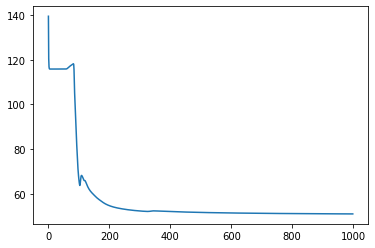

In [419]:
# print(losses)
plt.plot(losses)
plt.show()

In [420]:
print(f"Accuracy for training data: {round(tp/len(X_train), 2)*100}%")

Accuracy for training data: 67.0%


## For test data

In [421]:
tp_test = 0

for i in range(len(X_test)):
    x = X_test.iloc[i:i+1, :].to_numpy()
    target = y_test.to_numpy()
    y = []
    if target[i] == 0:
        y = [1, 0, 0]
    elif target[i] == 1:
        y = [0, 1, 0]
    elif target[i] == 2:
        y = [0, 0, 1]


    #network forward pas
    layer1_out, y_hat= forward_pass(x, W1, b1, W2, b2)
    
    print(f"{np.argmax(y_hat)} \ {np.argmax(y)}")
    
    if np.argmax(y_hat) == np.argmax(y):
        tp_test += 1
        

0 \ 0
2 \ 1
0 \ 0
0 \ 0
2 \ 2
2 \ 2
2 \ 2
0 \ 0
0 \ 0
2 \ 1
0 \ 0
2 \ 2
0 \ 0
2 \ 2
2 \ 2
0 \ 0
2 \ 2
0 \ 0
2 \ 1
0 \ 0
2 \ 1
2 \ 1
0 \ 0
0 \ 0
2 \ 1
0 \ 0
2 \ 1
2 \ 1
0 \ 0
2 \ 1
2 \ 1
2 \ 1
2 \ 1
2 \ 2
0 \ 0
0 \ 0
2 \ 2
2 \ 1
2 \ 2
2 \ 1
2 \ 2
2 \ 2
2 \ 1
2 \ 2
0 \ 0


In [422]:
print(f"Accuracy for test data: {round(tp_test/len(X_test), 2)*100}%")

Accuracy for test data: 67.0%
